# Activity 3.1 Logistic Regression

#### Objective(s):

This activity aims to solve classification problem using logistic regression

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to train and predict classification model using logistic regression.
* Demonstrate how to evaluate the performance of the logistic regression.
* Demonstrate how to visualize the performance of the logistic regression.

#### Resources:
* Jupyter Notebook
* Titanic 





#### Procedure:

Import the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data using Pandas and check the content of the dataframe

In [2]:
train = pd.read_csv(r'C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 312\Logistic Regression, Decision Tree , Random Forest\data\Logistic Regression\titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check the missing data. 
Use seaborn to create a simple heatmap to see where  are the missing data

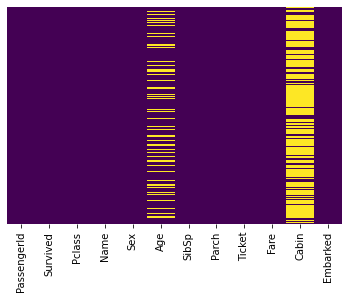

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

There are 20% of Age data is missing. We need to replace the missing data with some of imputation. 
The Cabin column are also missing too much of that data. 

Use data visualization to analyze the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

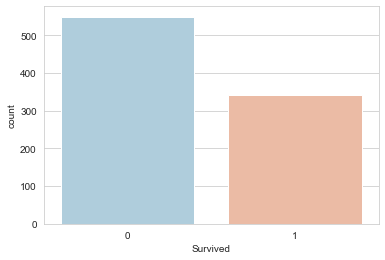

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

Interpret the result of the graph

    it seems that more people died than survived in the sinking of titanic. A little below 350 survived, while a little over 550 died

<AxesSubplot:xlabel='Survived', ylabel='count'>

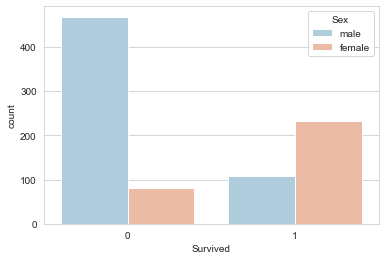

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

Interpret the result of the graph. 

    Clearly we can see that significantly more men died in the titanic incident than women. The number of women that survived were about twice the amount of men.

<AxesSubplot:xlabel='Survived', ylabel='count'>

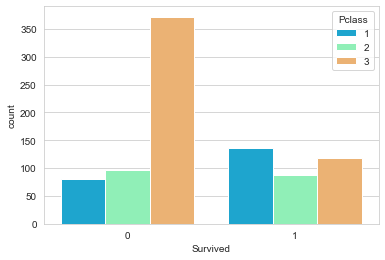

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

Interpret the result. 

    Most of the ones whjo died belong in the (Pclass = 3) group, whereas the least likely to die were the people in the (Pclas = 1), tho not by much 

In [ ]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

Interpret the result of the graph. 

Type your answer here

In [ ]:
import cufflinks as cf
cf.go_offline()

In [ ]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

Replace the missing data of the Age column. One way to do this is by filling in the mean age of all the passengers (imputation).


In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [ ]:
#create a function to replace the missing data
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
#apply the function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
#check the missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop the Cabin column and the row in Embarked that is NaN.

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
#drop NaN 
train.dropna(inplace=True)

Convert categorical features to dummy variables using pandas

In [ ]:
train.info()

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

Build the Logistic Regression Model

Split the data into a training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

Train the model 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

Predict the values for the testing data

In [ ]:
predictions = logmodel.predict(X_test)

Check precision,recall,f1-score using classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

Interpret the precision, recall f1-score

Type your answer here

Evaluate the accuracy and confusion matrix of the model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [ ]:
print(accuracy_score(y_test, predictions))

In [ ]:
confusion_matrix(y_test, predictions)

In [ ]:
data = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(predictions))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

Supplementary Activity:
* Choose your own dataset 
* Import the dataset 
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization 
* Solve classification problem using Logistic Regression
* Evaluate the model using classification report, accuracy and confusion matrix

In [ ]:
# type your code here






Conclusion:

#type your conclusion here